# A. Formulasi Masalah

Dari dataset tersebut akan mengklasifikasi kualitas pencemaran udara berdasarkan kategori perhitungan indeks standar pencemaran udara. Dimana dataset Indeks Standar Pencemaran Udara (ISPU) 7 tahun

# B. Eksplorasi dan Persiapan Data

## Importing Libraries


Import library yang dibutuhkan untuk mengolah data dan fungsi yang membantu untuk membangun model

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split

# Import Data

In [2]:
df2010 = pd.read_csv("ISPU_2010.csv")

df2012 = pd.read_csv("ISPU_2012.csv")

df2013 = pd.read_csv("ISPU_2013.csv")

df2014 = pd.read_csv("ISPU_2014.csv")

df2015 = pd.read_csv("ISPU_2015.csv")

df2016 = pd.read_csv("ISPU_2016.csv")

df2021 = pd.read_csv("ISPU_2021.csv")

## Integrasi data
Menggabungkan data dari berbagai sumber ke dalam satu tampilan terpadu.

In [3]:
ispu = pd.concat([df2016, df2021,df2010, df2012,df2012, df2013, df2014,df2015])

In [4]:
ispu

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,lokasi
0,8/1/2016,73,---,29,45,100,11,100,O3,SEDANG,DKI3
1,8/2/2016,58,---,30,38,131,14,131,O3,TIDAK SEHAT,DKI2
2,8/3/2016,64,---,30,41,136,21,136,O3,TIDAK SEHAT,DKI5
3,8/4/2016,87,---,30,49,133,15,133,O3,TIDAK SEHAT,DKI2
4,8/5/2016,107,---,30,47,108,21,108,O3,TIDAK SEHAT,DKI3
...,...,...,...,...,...,...,...,...,...,...,...
2004,9/26/2015,45,NaN,11,28,53,13,53,O3,SEDANG,DKI5 (Kebon Jeruk)
2005,9/27/2015,31,NaN,11,22,49,10,49,O3,BAIK,DKI5 (Kebon Jeruk)
2006,9/28/2015,41,NaN,11,25,59,13,59,O3,SEDANG,DKI5 (Kebon Jeruk)
2007,9/29/2015,25,NaN,11,27,41,12,41,O3,BAIK,DKI5 (Kebon Jeruk)


### mengubah type data menjadi string atau object

In [5]:
df_cleaned =ispu.astype(str)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14868 entries, 0 to 2008
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tanggal   14868 non-null  object
 1   pm10      14868 non-null  object
 2   pm25      14868 non-null  object
 3   so2       14868 non-null  object
 4   co        14868 non-null  object
 5   o3        14868 non-null  object
 6   no2       14868 non-null  object
 7   max       14868 non-null  object
 8   critical  14868 non-null  object
 9   categori  14868 non-null  object
 10  lokasi    14868 non-null  object
dtypes: object(11)
memory usage: 1.4+ MB


In [6]:
df_cleaned

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,lokasi
0,8/1/2016,73,---,29,45,100,11,100,O3,SEDANG,DKI3
1,8/2/2016,58,---,30,38,131,14,131,O3,TIDAK SEHAT,DKI2
2,8/3/2016,64,---,30,41,136,21,136,O3,TIDAK SEHAT,DKI5
3,8/4/2016,87,---,30,49,133,15,133,O3,TIDAK SEHAT,DKI2
4,8/5/2016,107,---,30,47,108,21,108,O3,TIDAK SEHAT,DKI3
...,...,...,...,...,...,...,...,...,...,...,...
2004,9/26/2015,45,nan,11,28,53,13,53,O3,SEDANG,DKI5 (Kebon Jeruk)
2005,9/27/2015,31,nan,11,22,49,10,49,O3,BAIK,DKI5 (Kebon Jeruk)
2006,9/28/2015,41,nan,11,25,59,13,59,O3,SEDANG,DKI5 (Kebon Jeruk)
2007,9/29/2015,25,nan,11,27,41,12,41,O3,BAIK,DKI5 (Kebon Jeruk)


#### **About the data:**

Dataset berisi sekitar 7 tahun pengamatan kualitas udara dari Provinsi DKI Jakarta. Pengamatan diambil dari berbagai stasiun.

Dalam proyek ini, kami akan menggunakan data ini untuk memprediksi apakah hari ini kualitas udara akan baik, sedang, atau tidak sehat. Ada 11 atribut termasuk variabel target "categori", yang menunjukkan apakah hari ini kualitas udara akan baik, sedang, atau tidak sehat.

### Menghapus kolom yang tidak perlu
menghapus kolom max dan critical karena parameter yang hasil pengukurannya paling tinggi dari pm10 sampai no2 yang bisa kita hitung sendiri nantinya dan menghapus kolom tanggal dan stasiun karena kategori berasal dari pm10 sampai no2.

In [7]:
df_cleaned = df_cleaned.drop(columns=['tanggal', 'lokasi', 'max', 'critical'])
df_cleaned

,pm10,pm25,so2,co,o3,no2,categori
0,73,---,29,45,100,11,SEDANG
1,58,---,30,38,131,14,TIDAK SEHAT
2,64,---,30,41,136,21,TIDAK SEHAT
3,87,---,30,49,133,15,TIDAK SEHAT
4,107,---,30,47,108,21,TIDAK SEHAT
...,...,...,...,...,...,...,...
2004,45,nan,11,28,53,13,SEDANG
2005,31,nan,11,22,49,10,BAIK
2006,41,nan,11,25,59,13,SEDANG
2007,25,nan,11,27,41,12,BAIK


### Handling missing data
Pada tahapan ini, akan dilakukan pengecheckan dataset apakah terdapat data yang bernilai null atau unknown. Ada beberapa strategi untuk menangani data yang bernilai null atau unknown, pada tugas ini saya memilih menghapus atau drop data yang bernilai null atau unknown karena jumlah record dataset yang dimiliki lumayan banyak.

In [8]:
df_cleaned = df_cleaned.replace('---', np.nan)
df_cleaned = df_cleaned.replace('nan', np.nan)
df_cleaned = df_cleaned.replace('TIDAK ADA DATA', np.nan)

df_cleaned.isnull().sum()

pm10          709
pm25        13053
so2           726
co            419
o3            721
no2           536
categori      216
dtype: int64

In [9]:
#numerik
df_cleaned = round(df_cleaned.fillna(df_cleaned.median()))

#kategori
df_cleaned = df_cleaned.dropna(axis=0)

df_cleaned.isnull().sum()

C:\ProgramData\Anaconda3\envs\AQIPrimeProject\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

In [10]:
df_cleaned

,pm10,pm25,so2,co,o3,no2,categori
0,73,80.0,29,45,100,11,SEDANG
1,58,80.0,30,38,131,14,TIDAK SEHAT
2,64,80.0,30,41,136,21,TIDAK SEHAT
3,87,80.0,30,49,133,15,TIDAK SEHAT
4,107,80.0,30,47,108,21,TIDAK SEHAT
...,...,...,...,...,...,...,...
2004,45,80.0,11,28,53,13,SEDANG
2005,31,80.0,11,22,49,10,BAIK
2006,41,80.0,11,25,59,13,SEDANG
2007,25,80.0,11,27,41,12,BAIK


In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14652 entries, 0 to 2008
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pm10      14652 non-null  object
 1   pm25      14652 non-null  object
 2   so2       14652 non-null  object
 3   co        14652 non-null  object
 4   o3        14652 non-null  object
 5   no2       14652 non-null  object
 6   categori  14652 non-null  object
dtypes: object(7)
memory usage: 915.8+ KB


In [12]:
#Parsing int64
df_cleaned = df_cleaned.astype({'pm10': int, 'pm25': int, 'so2': int, 'co': int, 'o3': int, 'no2': int})

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14652 entries, 0 to 2008
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pm10      14652 non-null  int32 
 1   pm25      14652 non-null  int32 
 2   so2       14652 non-null  int32 
 3   co        14652 non-null  int32 
 4   o3        14652 non-null  int32 
 5   no2       14652 non-null  int32 
 6   categori  14652 non-null  object
dtypes: int32(6), object(1)
memory usage: 572.3+ KB


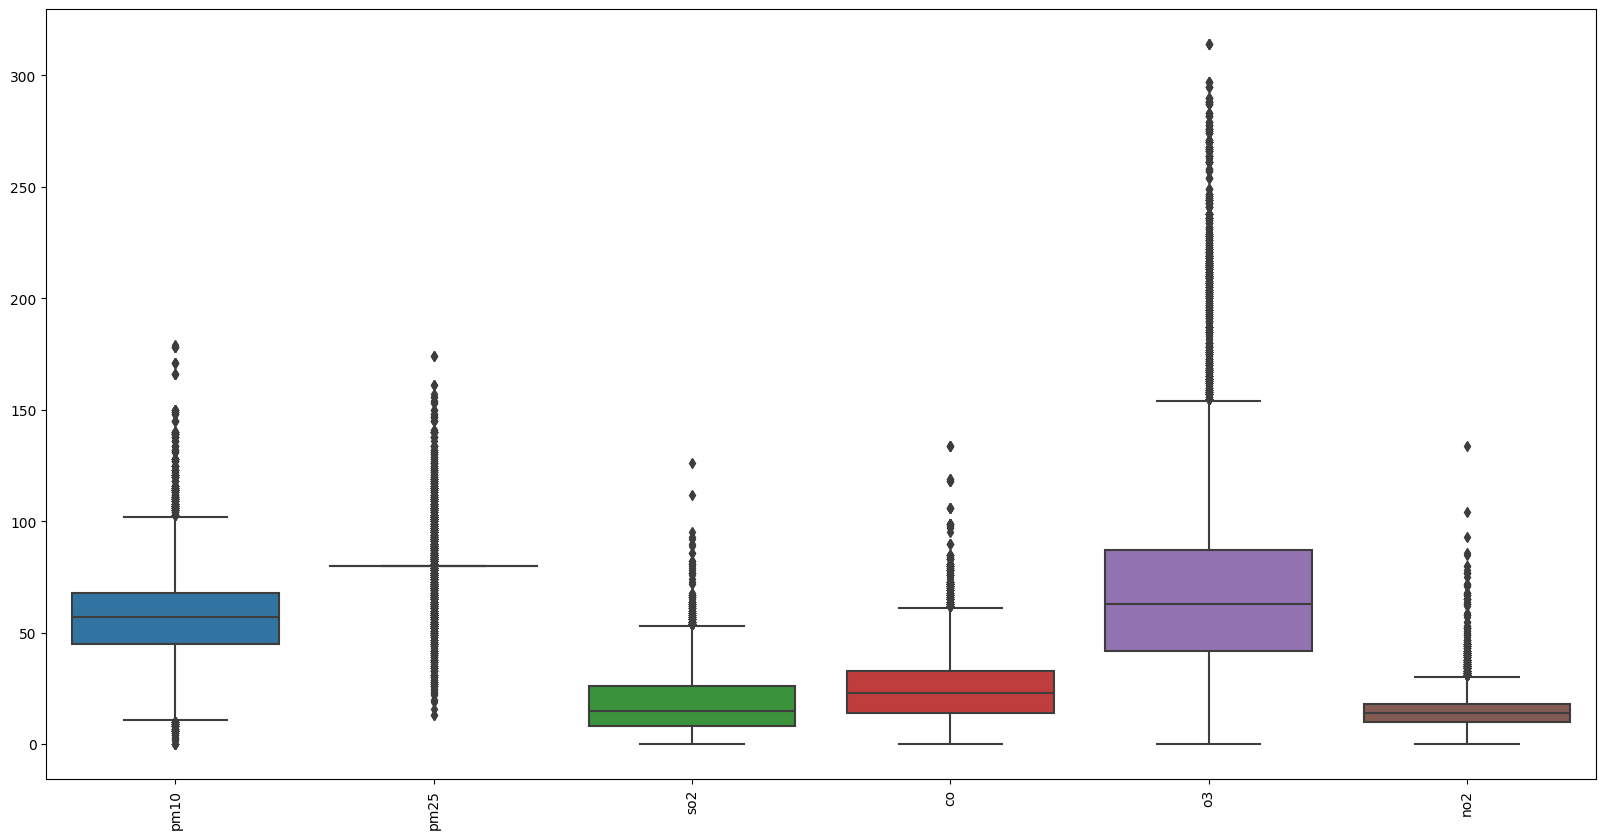

In [13]:
features = df_cleaned.drop(['categori'], axis=1) # dropping target
#Detecting outliers
plt.figure(figsize=(20,10))
sns.boxplot(data = features)
plt.xticks(rotation=90)
plt.show()

SEDANG                9455
TIDAK SEHAT           2437
BAIK                  2213
SANGAT TIDAK SEHAT     543
BERBAHAYA                4
Name: categori, dtype: int64

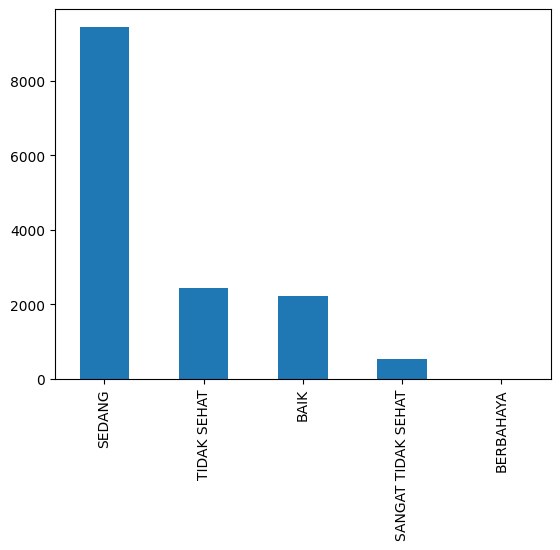

In [14]:
dki_count  = df_cleaned['categori'].value_counts()
dki_count.plot(kind= 'bar')
dki_count

In [15]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
pm10,14652.0,56.407931,20.852353,0.0,45.0,57.0,68.0,179.0
pm25,14652.0,80.077054,8.623183,13.0,80.0,80.0,80.0,174.0
so2,14652.0,17.921239,12.971386,0.0,8.0,15.0,26.0,126.0
co,14652.0,24.942806,14.103080,0.0,14.0,23.0,33.0,134.0
o3,14652.0,72.046820,46.537560,0.0,42.0,63.0,87.0,314.0
no2,14652.0,14.633019,7.694520,0.0,10.0,14.0,18.0,134.0


In [16]:
df_cleaned

,pm10,pm25,so2,co,o3,no2,categori
0,73,80,29,45,100,11,SEDANG
1,58,80,30,38,131,14,TIDAK SEHAT
2,64,80,30,41,136,21,TIDAK SEHAT
3,87,80,30,49,133,15,TIDAK SEHAT
4,107,80,30,47,108,21,TIDAK SEHAT
...,...,...,...,...,...,...,...
2004,45,80,11,28,53,13,SEDANG
2005,31,80,11,22,49,10,BAIK
2006,41,80,11,25,59,13,SEDANG
2007,25,80,11,27,41,12,BAIK


SEDANG                9455
TIDAK SEHAT           2437
BAIK                  2213
SANGAT TIDAK SEHAT     543
BERBAHAYA                4
Name: categori, dtype: int64

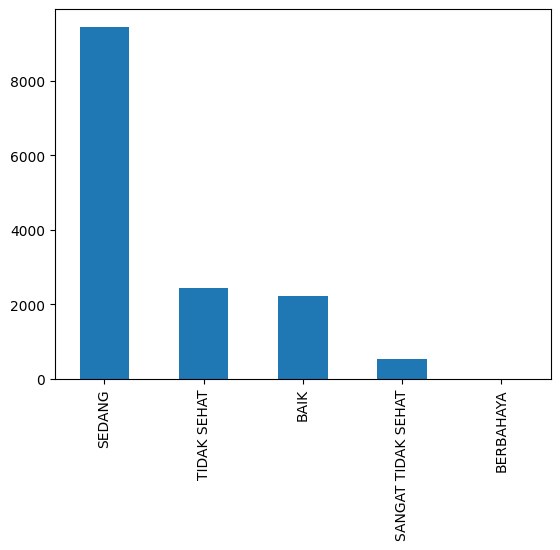

In [17]:
dki_count1  = df_cleaned['categori'].value_counts()
dki_count1.plot(kind= 'bar')
dki_count1

In [18]:
label_encoder = LabelEncoder()
for i in ['categori']:
    df_cleaned[i] = label_encoder.fit_transform(df_cleaned[i])

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14652 entries, 0 to 2008
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   pm10      14652 non-null  int32
 1   pm25      14652 non-null  int32
 2   so2       14652 non-null  int32
 3   co        14652 non-null  int32
 4   o3        14652 non-null  int32
 5   no2       14652 non-null  int32
 6   categori  14652 non-null  int32
dtypes: int32(7)
memory usage: 515.1 KB


SEDANG                9455
TIDAK SEHAT           2437
BAIK                  2213
SANGAT TIDAK SEHAT     543
BERBAHAYA                4
Name: categori, dtype: int64

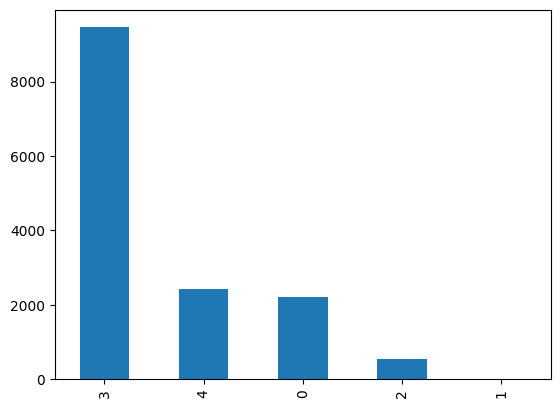

In [19]:
dki_count  = df_cleaned['categori'].value_counts()
dki_count.plot(kind= 'bar')
dki_count1

3 = SEDANG                  
4 = TIDAK SEHAT             
0 = BAIK                    
2 = SANGAT TIDAK SEHAT      
1 = BERBAHAYA                 

In [20]:
features = df_cleaned.drop(['categori'], axis=1) # dropping target

min_max_scaler = MinMaxScaler()
df_transformed = df_cleaned.copy()
for feature in features:
    df_transformed[[feature]] = min_max_scaler.fit_transform(df_cleaned[[feature]])

df_transformed

,pm10,pm25,so2,co,o3,no2,categori
0,0.407821,0.416149,0.230159,0.335821,0.318471,0.082090,3
1,0.324022,0.416149,0.238095,0.283582,0.417197,0.104478,4
2,0.357542,0.416149,0.238095,0.305970,0.433121,0.156716,4
3,0.486034,0.416149,0.238095,0.365672,0.423567,0.111940,4
4,0.597765,0.416149,0.238095,0.350746,0.343949,0.156716,4
...,...,...,...,...,...,...,...
2004,0.251397,0.416149,0.087302,0.208955,0.168790,0.097015,3
2005,0.173184,0.416149,0.087302,0.164179,0.156051,0.074627,0
2006,0.229050,0.416149,0.087302,0.186567,0.187898,0.097015,3
2007,0.139665,0.416149,0.087302,0.201493,0.130573,0.089552,0


In [21]:
df_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
pm10,14652.0,0.315128,0.116494,0.0,0.251397,0.318436,0.379888,1.0
pm25,14652.0,0.416628,0.053560,0.0,0.416149,0.416149,0.416149,1.0
so2,14652.0,0.142232,0.102948,0.0,0.063492,0.119048,0.206349,1.0
co,14652.0,0.186140,0.105247,0.0,0.104478,0.171642,0.246269,1.0
o3,14652.0,0.229448,0.148209,0.0,0.133758,0.200637,0.277070,1.0
no2,14652.0,0.109202,0.057422,0.0,0.074627,0.104478,0.134328,1.0
categori,14652.0,2.675607,1.207759,0.0,3.000000,3.000000,3.000000,4.0


<AxesSubplot:xlabel='categori', ylabel='pm10'>

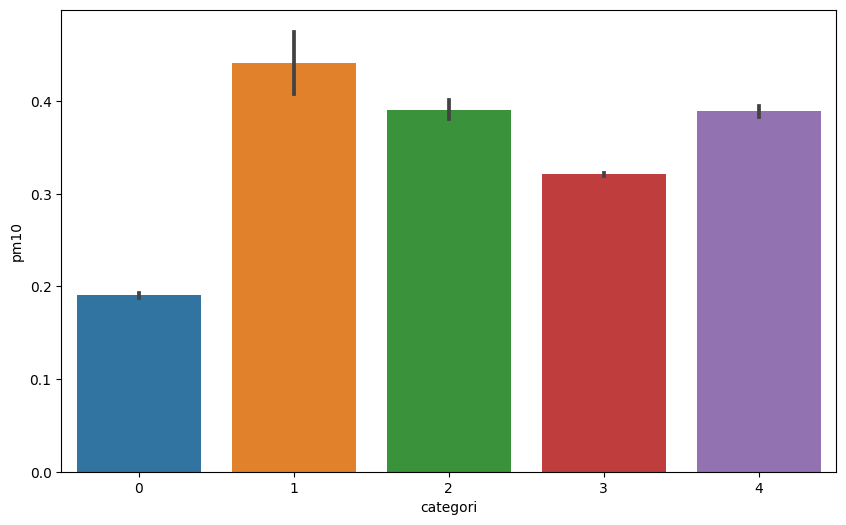

In [22]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'categori', y = 'pm10', data = df_transformed)

<AxesSubplot:xlabel='categori', ylabel='pm25'>

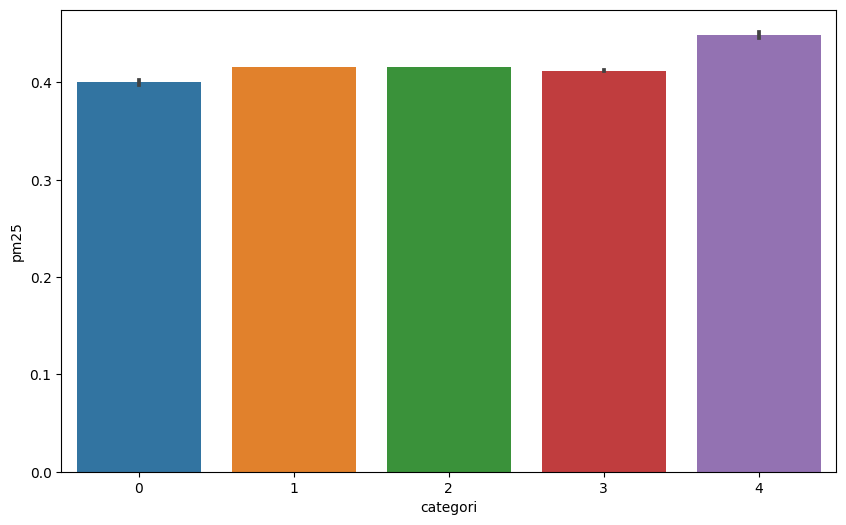

In [23]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'categori', y = 'pm25', data = df_transformed)

<AxesSubplot:xlabel='categori', ylabel='so2'>

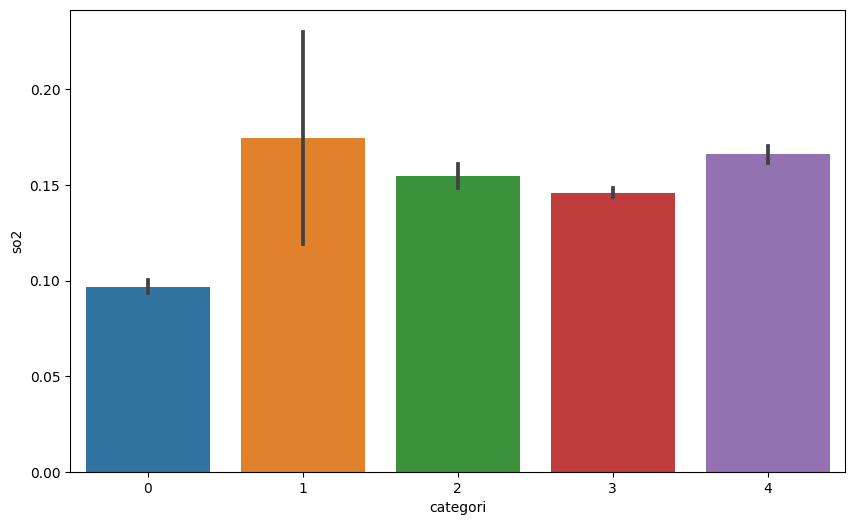

In [24]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'categori', y = 'so2', data = df_transformed)

<AxesSubplot:xlabel='categori', ylabel='count'>

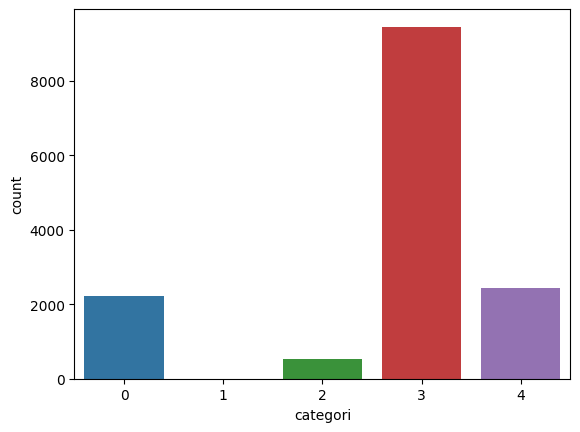

In [25]:
sns.countplot(x= df_transformed['categori'])

In [26]:
X = df_transformed.iloc[:, 0:6].values
y = df_transformed.iloc[:, 6].values

#### 30% data test 70% data test

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import datasets
from sklearn import preprocessing
import seaborn as sns
from sklearn.tree import export_graphviz

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
dtc30 = DecisionTreeClassifier(max_depth=5)
dtc30.fit(X_train, y_train)
pred_dtc30 = dtc30.predict(X_test)

In [33]:
print(classification_report(y_test, pred_dtc30))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91       410
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00       100
           3       0.97      1.00      0.98      1941
           4       1.00      0.99      1.00       479

    accuracy                           0.98      2931
   macro avg       0.99      0.97      0.98      2931
weighted avg       0.98      0.98      0.98      2931



In [34]:
cm = confusion_matrix(y_test, pred_dtc30)
tn30 = cm[0, 0]
fp30 = cm[0, 1]
fn30 = cm[1, 0]
tp30 = cm[1, 1]

In [35]:
print("True Negative (TN):", tn30)
print("False Positive (FP):", fp30)
print("False Negative (FN):", fn30)
print("True Positive (TP):", tp30)

True Negative (TN): 348
False Positive (FP): 0
False Negative (FN): 0
True Positive (TP): 1


In [36]:
recall_pos = tp30 / (tp30 + fn30)
recall_neg = tn30 / (tn30 + fp30)

In [37]:
gmean = (recall_pos * recall_neg) ** 0.5
print("G-mean:", gmean)

G-mean: 1.0


In [38]:
specificity = tn30 / (tn30 + fp30)

print("Specificity:", specificity)

Specificity: 1.0


In [39]:
sensitivity = tp30 / (tp30 + fn30)
print("Sensitivity:", sensitivity)

Sensitivity: 1.0


In [40]:
class_count = df_transformed['categori'].value_counts()
class_ratio = class_count / len(df_transformed)

In [41]:
print("Perbandingan jumlah sampel pada setiap kelas:")
print(class_ratio)

# cek apakah data seimbang atau tidak
if min(class_ratio) / max(class_ratio) >= 0.5:
    print("Data seimbang")
else:
    print("Data tidak seimbang")

Perbandingan jumlah sampel pada setiap kelas:
3    0.645304
4    0.166325
0    0.151037
2    0.037060
1    0.000273
Name: categori, dtype: float64
Data tidak seimbang


#  ==============================================================

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import datasets
from sklearn import preprocessing
import seaborn as sns
from sklearn.tree import export_graphviz

In [43]:
df_cleaned.head()

,pm10,pm25,so2,co,o3,no2,categori
0,73,80,29,45,100,11,3
1,58,80,30,38,131,14,4
2,64,80,30,41,136,21,4
3,87,80,30,49,133,15,4
4,107,80,30,47,108,21,4


In [44]:
X = df_cleaned.iloc[:, 0:6].values
y = df_cleaned.iloc[:, 6].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [46]:
dtc = DecisionTreeClassifier(max_depth=6, criterion='entropy', random_state=3)
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)

In [47]:
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       410
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00       100
           3       0.97      1.00      0.99      1941
           4       1.00      1.00      1.00       479

    accuracy                           0.98      2931
   macro avg       0.99      0.98      0.98      2931
weighted avg       0.98      0.98      0.98      2931



In [52]:
plt.figure(figsize=(200,50))
_ = tree.plot_tree(dtc , filled=True)

In [53]:
pred_dtc1 = dtc.predict([['51','40', '12','15','10','11']])

In [54]:
pred_dtc1

array([3])

In [55]:
fp = confusion_matrix(y_test, pred_dtc).ravel()

In [56]:
print(confusion_matrix(y_test, pred_dtc))

[[ 362    0    0   48    0]
 [   0    1    0    0    0]
 [   0    0  100    0    0]
 [   7    0    0 1934    0]
 [   0    0    0    2  477]]


In [57]:
cm = confusion_matrix(y_test, pred_dtc)
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
tp = cm[1, 1]

In [58]:
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)
print("True Positive (TP):", tp)

True Negative (TN): 362
False Positive (FP): 0
False Negative (FN): 0
True Positive (TP): 1


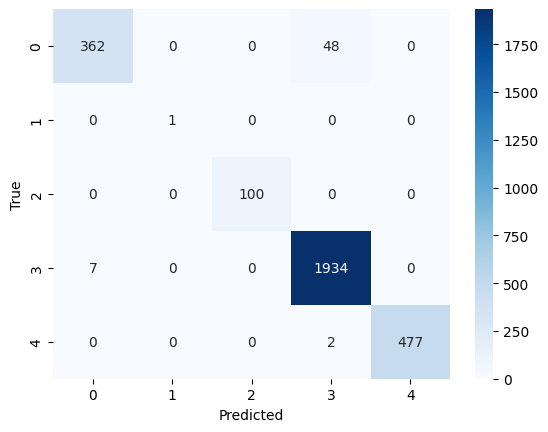

In [59]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()